# Model: Decision Tree

## 1. Theory Background

### 1.1 The Decision Tree Algorithm  

The decision tree algorithm is a popular and widely used machine learning algorithm used for both classification and regression tasks. It works by constructing a tree-like model of decisions and their possible consequences. The tree consists of nodes that represent decisions or features, edges that represent the decision rules or conditions, and leaves that represent the outcome or class labels.

The decision tree algorithm works by recursively splitting the dataset into smaller and smaller subsets based on the values of the input features, until a stopping criterion is reached. The goal is to create a tree that can accurately predict the class or value of new, unseen instances.

The decision tree algorithm is easy to understand and interpret, making it useful for both exploratory data analysis and predictive modeling. It can handle both categorical and numerical data, as well as missing data. However, it can suffer from overfitting if the tree is too deep or the stopping criterion is not well-defined.


### 1.2 Advantages of Decision Tree
The decision tree has a great advantage of being capable of handling both numerical and categorical variables. Many other modelling techniques can handle only one kind of variable.  

The decision tree model validation can be done through statistical tests and the reliability can be established easily.  

As it is a white box model, so the logic behind it is visible to us and we can easily interpret the result unlike the black-box model like an artificial neural network.

## 2. Import necessary Liabraries

In [29]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_curve, auc

## 3. Demonstrate dataset content

In [30]:
hypertension = pd.read_csv("hypertension.csv")
hypertension.head()

,Unnamed: 0,_TOTINDA,_BMI5,DROCDY3_,AVEDRNK3,_RFBING5,CHOLMED3,FRENCHF1,FRUTDA2_,FTJUDA2_,...,_RFCHOL3,_MICHD,_EDUCAG,_CASTHM1,_RFSMOK3,_DRDXAR3,_IMPRACE,_AGE80,AlchoIntake,FriesFreq
0,3,Yes,33.47,14,3,Yes,No,204,0.43,0.71,...,Yes,No,Graduated High School,No,No,No,White,62,2.94,0.571429
1,9,Yes,39.94,10,2,No,Yes,202,1.00,0.00,...,No,No,Graduated High School,No,No,Yes,White,65,1.40,0.285714
2,22,No,35.87,13,2,No,Yes,304,0.07,0.03,...,Yes,No,Graduated High School,No,Yes,No,White,68,1.82,0.133333
3,49,Yes,22.24,3,1,No,Yes,201,0.43,0.00,...,Yes,Yes,Graduated High School,No,No,Yes,White,77,0.21,0.142857
4,61,Yes,27.84,10,2,Yes,No,307,1.00,0.10,...,No,No,Graduated from College or Technical School,No,No,No,White,58,1.40,0.233333


## 4. Prepare Dataset

### 4.1 Select variables

Based on the EDA result, we have the below selected variable as independent vatiables (feature variables):   

_TOTINDA, _BMI5, AlchoIntake, CHOLMED3, DIABETE4, _RFCHOL3, _MICHD, _EDUCAG, _DRDXAR3, _AGE80  

And the dependent variable, or target variable will be： _RFHYPE6.

In [31]:
hypertension_dataset = pd.DataFrame(hypertension[['_TOTINDA','_BMI5','AlchoIntake','CHOLMED3','_RFHYPE6','DIABETE4','_RFCHOL3','_MICHD','_EDUCAG','_DRDXAR3','_AGE80']])
hypertension_dataset.head()

,_TOTINDA,_BMI5,AlchoIntake,CHOLMED3,_RFHYPE6,DIABETE4,_RFCHOL3,_MICHD,_EDUCAG,_DRDXAR3,_AGE80
0,Yes,33.47,2.94,No,Yes,Yes,Yes,No,Graduated High School,No,62
1,Yes,39.94,1.40,Yes,Yes,No,No,No,Graduated High School,Yes,65
2,No,35.87,1.82,Yes,Yes,No,Yes,No,Graduated High School,No,68
3,Yes,22.24,0.21,Yes,Yes,Yes,Yes,Yes,Graduated High School,Yes,77
4,Yes,27.84,1.40,No,No,No,No,No,Graduated from College or Technical School,No,58


### 4.2 Decode categorical variables   

As you can see from the dataset above, it included categorical variables such as _TOTINDA. Such categorical results cannot be fit in the Decision Tree Classification model , as the model requires Numeric data instead of Strings as inputs.  

Therefore, for the categorical variables with a string value, we translated those value to numeric ones, namely Yes = 1, No = 0.  

In [32]:
hypertension_dataset.replace("Yes", 1, inplace = True)
hypertension_dataset.replace("No", 0, inplace = True)

And for the variable _EDUCAG, which has more than 2 categories, we decoded it to 1 to 4, respectively.

In [33]:
#Decode _EDUCAG
hypertension_dataset.replace("Did not graduate High School", 1, inplace = True)
hypertension_dataset.replace("Graduated High School", 2, inplace = True)
hypertension_dataset.replace("Attended College or Technical School", 3, inplace = True)
hypertension_dataset.replace("Graduated from College or Technical School", 4, inplace = True)

hypertension_dataset.head()

,_TOTINDA,_BMI5,AlchoIntake,CHOLMED3,_RFHYPE6,DIABETE4,_RFCHOL3,_MICHD,_EDUCAG,_DRDXAR3,_AGE80
0,1,33.47,2.94,0,1,1,1,0,2,0,62
1,1,39.94,1.40,1,1,0,0,0,2,1,65
2,0,35.87,1.82,1,1,0,1,0,2,0,68
3,1,22.24,0.21,1,1,1,1,1,2,1,77
4,1,27.84,1.40,0,0,0,0,0,4,0,58


### 4.3 Ready for next step  


Now, the dataset is all set for the next step: fitting in the Decision Tree Model, with 76,825 non-null values.

In [34]:
hypertension_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76825 entries, 0 to 76824
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _TOTINDA     76825 non-null  int64  
 1   _BMI5        76825 non-null  float64
 2   AlchoIntake  76825 non-null  float64
 3   CHOLMED3     76825 non-null  int64  
 4   _RFHYPE6     76825 non-null  int64  
 5   DIABETE4     76825 non-null  int64  
 6   _RFCHOL3     76825 non-null  int64  
 7   _MICHD       76825 non-null  int64  
 8   _EDUCAG      76825 non-null  int64  
 9   _DRDXAR3     76825 non-null  int64  
 10  _AGE80       76825 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 6.4 MB


## 5. The Decision Tree Model

### 5.1 Seperate feature variables and target variable 

In this step, feature variables are merged into X, and target varible is y.

In [35]:
#split dataset in features and target variable
feature_cols = ['_TOTINDA','AlchoIntake', '_BMI5', 'CHOLMED3', '_MICHD', '_RFCHOL3', 'DIABETE4','_EDUCAG','_DRDXAR3','_AGE80']
label = ['_RFHYPE6']
X = hypertension_dataset[feature_cols] # Features
y = hypertension_dataset[label] # Target variable

### 5.2 Split to Train and Test set  

To understand the model performance and to determine accuracy, we randomly split the X and Y dataset into Train and Test dataset by a 75%-25% proportion, producing X_train, X_test and y_train, y_test.

In [36]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1015) # 75% training and 25% test

### 5.3 Create a Decision Tree Model using Scikit-learn  

To do the classification, we have imported the DecisionTreeClassifier() from sklearn. This special classifier is capable of classifying binary variable as well as multiclass variables.  

The following code first fits the decision tree classifier clf to the training datasets: X_train and y_train. This means that the decision tree is trained to make predictions based on the feature values in X_train and the corresponding target values in y_train.   

Next, we use the trained decision tree classifier clf to predict the target values for the test data X_test. The predicted values are stored in the variable y_pred.

In [37]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### 5.4 Evaluating Accuracy

With the predicted data y_pred based on the features in X_test, which was derived from the decision tree model, we can determine the accuracy of the model by comparing predicted target values y_pred with true target values y_test.  

#### 5.4.1 ROC Curve and AUC

ROC curve is a graphical plot that compares the true positive rate (TPR) and false positive rate (FPR) at different classification thresholds. TPR is the number of correctly predicted positive cases out of the total number of positive cases, while FPR is the number of incorrectly predicted positive cases to the total number of negative cases.

AUC is a metric that summarises the performance of the classifier based on the ROC curve. It is the area under the ROC curve which measures the overall performance of the model across all possible classification thresholds. AUC is a measure of the prediction accuracy of the model which ranges from 0 to 1, with 0 representing a poor classifier and 1 representing a perfect classifier.

We calculated the Accuracy.

In [40]:
# Model Accuracy, how often is the classifier correct?
FPR, TPR, thresholds = roc_curve(y_test, y_pred)
test_AUC = auc(FPR,TPR)
print()
print("Accuracy:",test_AUC)


Accuracy: 0.6087051060285291


### 5.5 Determining TPR/FPR

Other important indicators are True Positive Rate(TPR) and False Positive Rate(FPR), calculated from Confusion Matirx.

TPR is the number of correctly predicted positive cases out of the total number of positive cases, while FPR is the number of incorrectly predicted positive cases to the total number of negative cases.



Confusion matrix
 [[8364 3546]
 [3538 3759]]

Goodness of Fit of Model 	Test Dataset
True Positive Rate		: 0.5151432095381664
False Positive Rate		: 0.2977329974811083
------------------------------------------------------


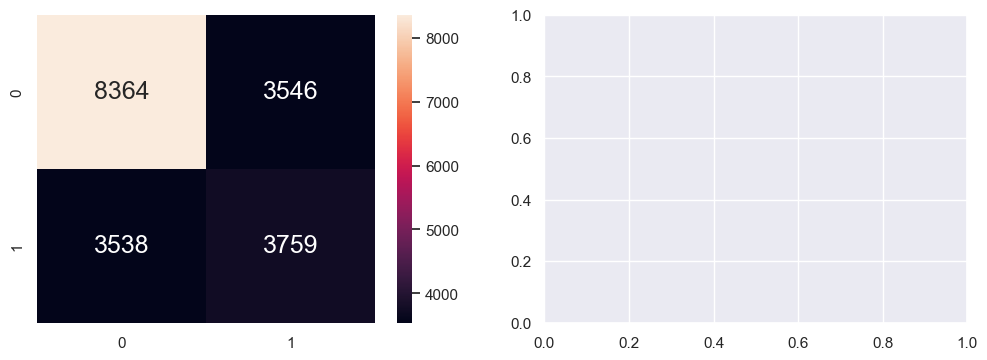

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

#A function to find the True Positive Rate, False Positive Rate
#TPR = TP/(TP+FN), FPR = FP/(FP+TN)
def classification_error(y_true,y_pred):
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR

[TPR1_test, FPR1_test] = classification_error(y_test, y_pred)

# Print Classification Accuracy, True Positive Rate, False Positive Rate 
# Check the Goodness of Fit 
print()
print("Goodness of Fit of Model \tTest Dataset")
print("True Positive Rate\t\t:", [TPR1_test, FPR1_test][0])
print("False Positive Rate\t\t:", [TPR1_test, FPR1_test][1])
print("------------------------------------------------------")



### 5.6 Visualizing Decision Trees

Model accuracy score with criterion entropy: 0.6317


[Text(0.6119690854759348, 0.9868421052631579, 'X[3] <= 0.5\ngini = 0.469\nsamples = 57618\nvalue = [35981, 21637]'),
 Text(0.37047083267240943, 0.9605263157894737, 'X[9] <= 54.5\ngini = 0.395\nsamples = 41683\nvalue = [30371, 11312]'),
 Text(0.16827599881626534, 0.9342105263157895, 'X[2] <= 28.675\ngini = 0.299\nsamples = 24376\nvalue = [19911, 4465]'),
 Text(0.07931169617333278, 0.9078947368421053, 'X[9] <= 38.5\ngini = 0.212\nsamples = 14475\nvalue = [12727, 1748]'),
 Text(0.04069846837969065, 0.881578947368421, 'X[5] <= 0.5\ngini = 0.149\nsamples = 7116\nvalue = [6539, 577]'),
 Text(0.02600448363047433, 0.8552631578947368, 'X[2] <= 23.565\ngini = 0.133\nsamples = 6289\nvalue = [5837, 452]'),
 Text(0.007245284523160824, 0.8289473684210527, 'X[1] <= 4.025\ngini = 0.095\nsamples = 2550\nvalue = [2423, 127]'),
 Text(0.0029137848879685624, 0.8026315789473685, 'X[0] <= 0.5\ngini = 0.08\nsamples = 1686\nvalue = [1616, 70]'),
 Text(0.0005405800094015129, 0.7763157894736842, 'X[1] <= 0.875\n

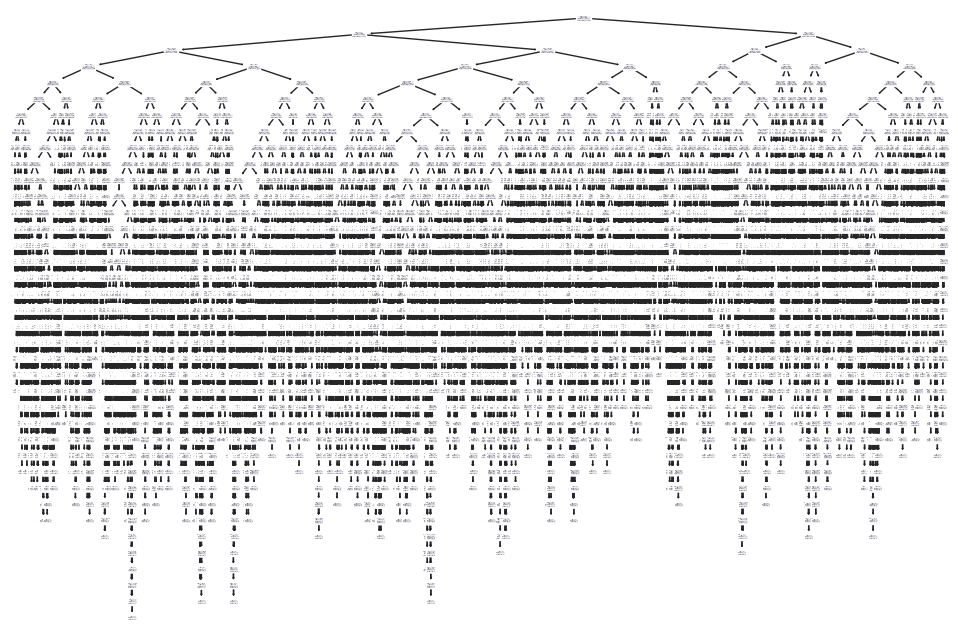

In [12]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
y_pred = clf.predict(X_train)
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train))

### 5.7 Optimizing Decision Tree Performance    

#### 5.7.1 What can be improved

Criterion : (default=”gini”) This parameter allows us to use the different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

Max_depth : Maximum Depth of a Tree. If no specified, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting. Thus, we need to find the best Max_depth for the model to maximise prediction accuracy yet minimise overfitting of the data.

#### 5.7.2 How to determin Max_depth  

Increasing  values will be tried on the Decision Tree model till finding the peak of the ROC curve(largest area), which will help us identify the highest Accuracy that also gives us the optimal Max_depth, also being the best trade-off between false positive rate and true positive rate.

The following code tried with a MAx_depth from 1 to 9, and by analysing the result we can find the the area of the ROC curve remains unchanged with a value of 0.77 when Max_depth >= 5. So, Max_depth == 5 will be the best fit.

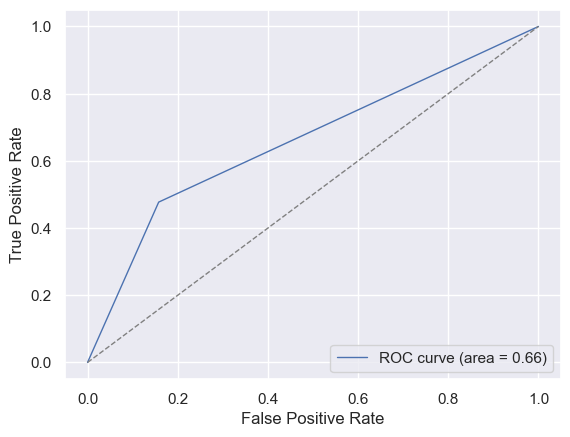

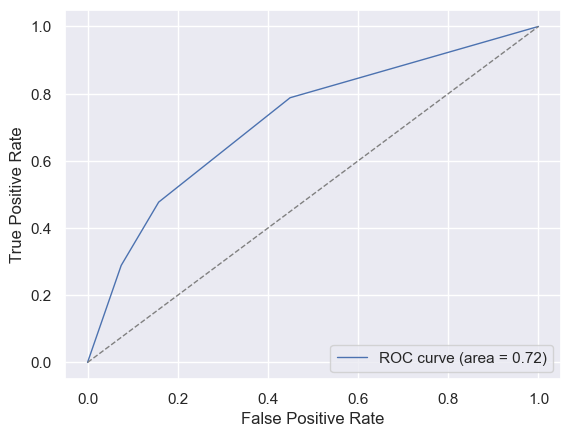

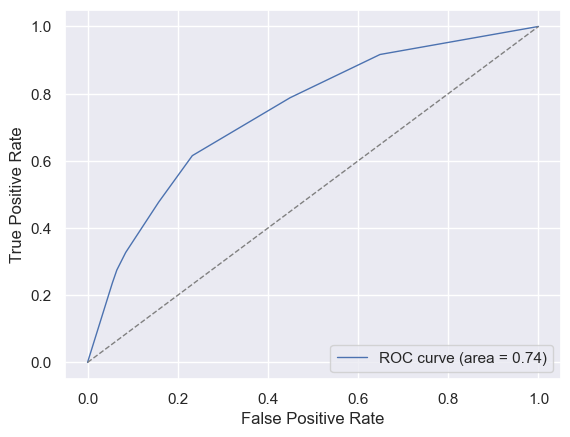

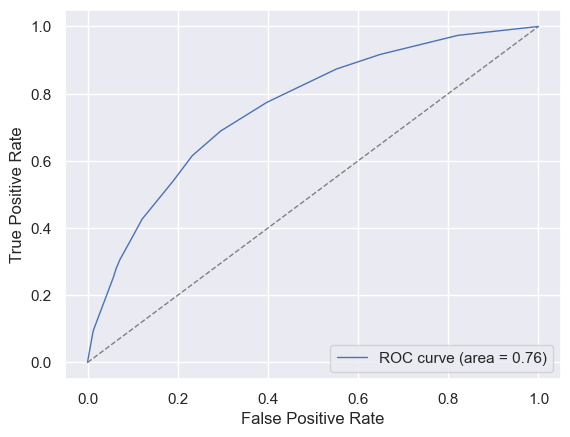

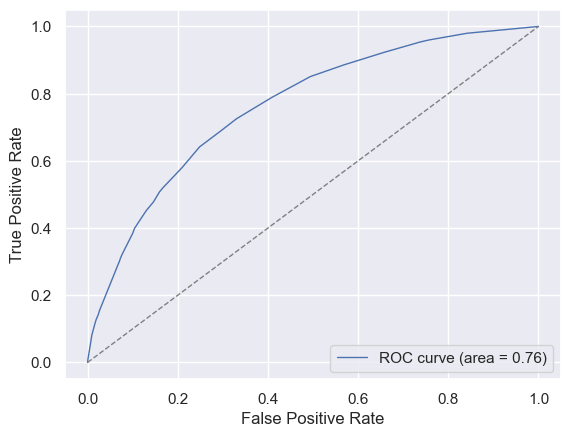

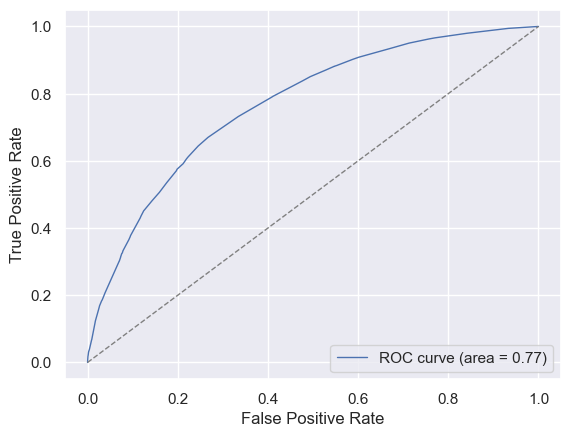

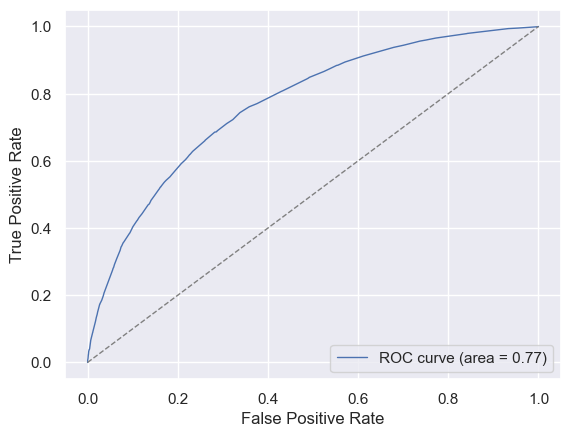

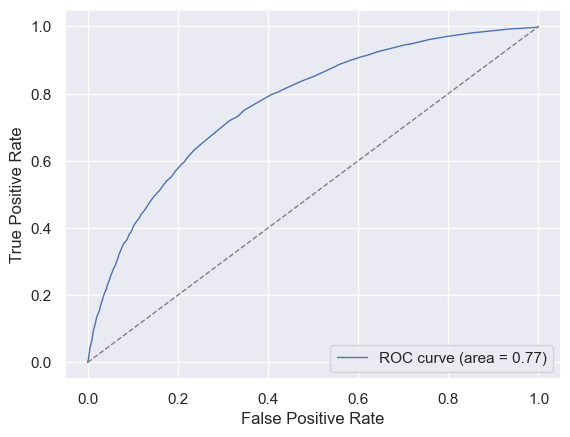

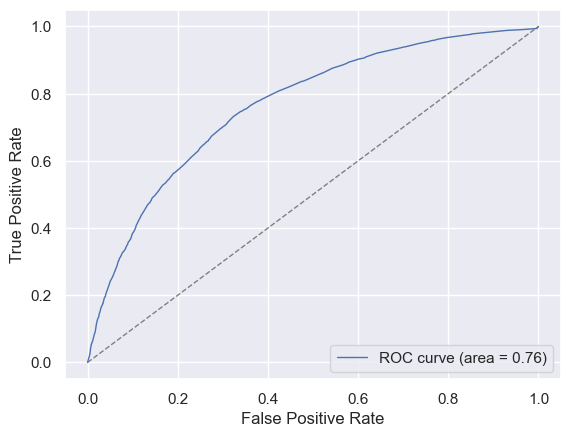

In [45]:
def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color='gray', lw=1)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
from sklearn.tree import DecisionTreeClassifier

max_depths = range(1, 10)

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    plot_roc_curve(y_test, y_pred_prob)

#### 5.7.3 The Optimised Model

We now come to our optimised model with a better criterion and the best Max_depth we just found.

As the result shows, the Accuracy of the Optimized Model, as well as the TPF/FPR, are significantly higher than the previous one, which indicates the optimization is successful and we have arrived at a more accurate Decision Tree Model. (Based on the current run)

Confusion matrix
 [[9876 2034]
 [3471 3826]]

Accuracy: 0.6767721043360353
Previous Accuracy: 0.6087051060285291
Improvement:  0.06806699830750618


Goodness of Fit of Model: 
True Positive Rate		: 0.5243250650952446
False Positive Rate		: 0.1707808564231738
------------------------------------------------------
Previous Goodness of Fit of Model
True Positive Rate: 0.5131398537477148
False Positive Rate: 0.2900111919418019
------------------------------------------------------
Improvement on the TPR:  0.009181855557078178
Improvement on the FPR:  0.1707808564231738



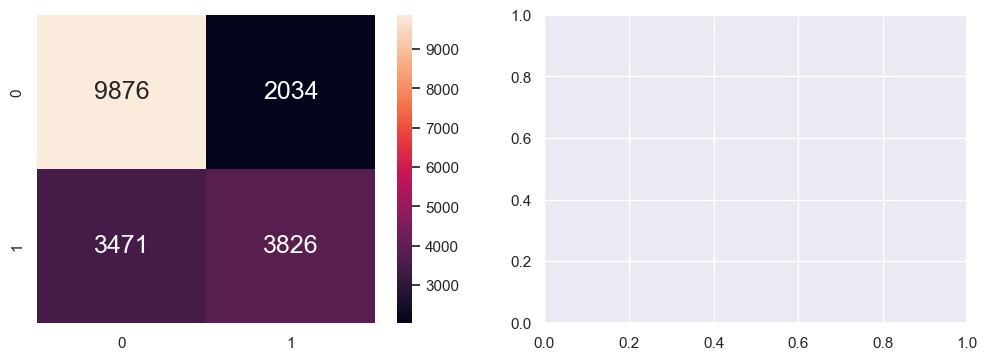

In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

#A function to find the True Positive Rate, False Positive Rate
#TPR = TP/(TP+FN), FPR = FP/(FP+TN)
def classification_error(y_true,y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR

[TPR1_test, FPR1_test] = classification_error(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
FPR, TPR, thresholds = roc_curve(y_test, y_pred)
test_AUC = auc(FPR,TPR)
print()
print("Accuracy:",test_AUC)
print("Previous Accuracy: 0.6087051060285291")
print("Improvement: ", test_AUC - 0.6087051060285291 )
print()


# Print Classification Accuracy, True Positive Rate, False Positive Rate 
# Check the Goodness of Fit 
print()
print("Goodness of Fit of Model: ")
print("True Positive Rate\t\t:", [TPR1_test, FPR1_test][0])
print("False Positive Rate\t\t:", [TPR1_test, FPR1_test][1])
print("------------------------------------------------------")

print("Previous Goodness of Fit of Model")
print("True Positive Rate: 0.5131398537477148")
print("False Positive Rate: 0.2900111919418019")
print("------------------------------------------------------")

print("Improvement on the TPR: ", [TPR1_test, FPR1_test][0] - 0.5151432095381664)
print("Improvement on the FPR: ", [0.2977329974811083 - TPR1_test, FPR1_test][1])
print()


### 5.8 Visualizing Optimized Decision Trees

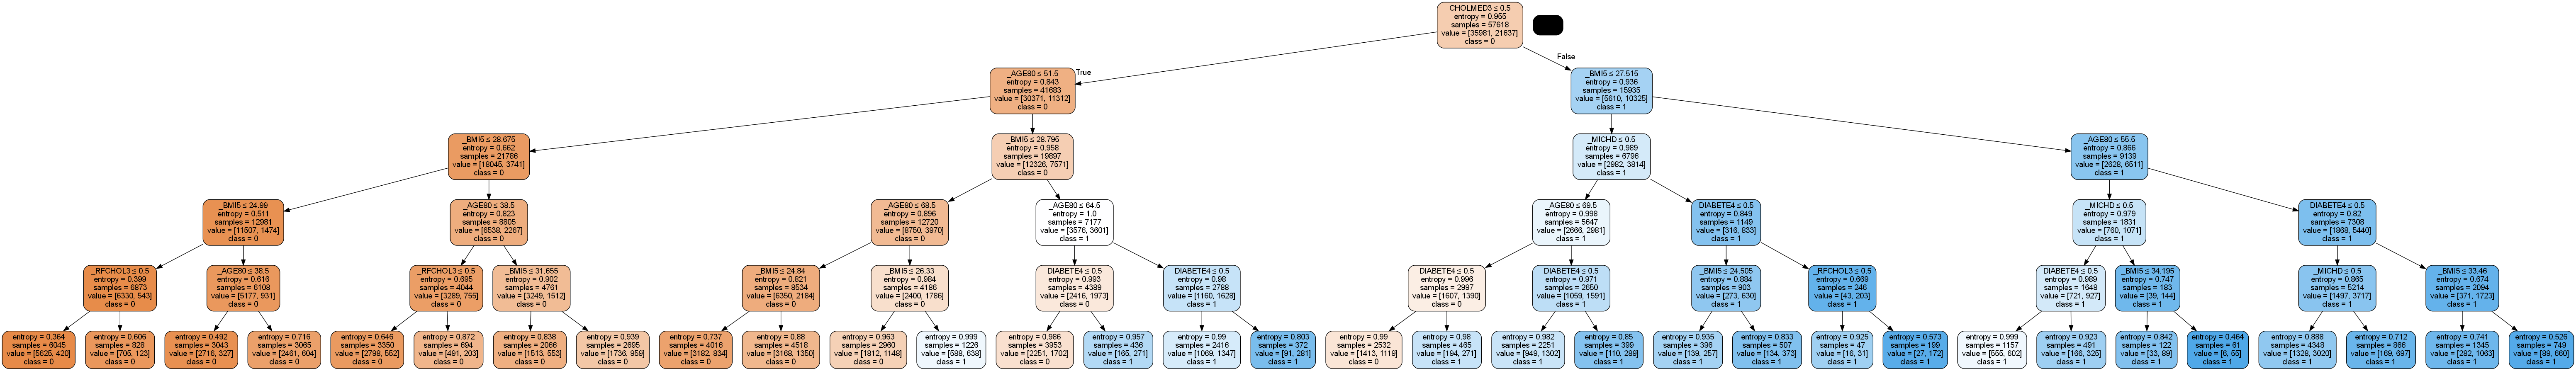

In [15]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypertension.png')
Image(graph.create_png())